<a href="https://colab.research.google.com/github/SungaHwang/ML_practice/blob/master/%E1%84%89%E1%85%B5%E1%86%B7%E1%84%85%E1%85%B5%EC%84%B1%ED%96%A5%EC%98%88%EC%B8%A1AI%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심리성향예측AI경진대회

### 데이터 설명(출처: Dacon)

* index
* Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
* Qa : Secret
* Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
* Qc : Anyone who completely trusts anyone else is asking for trouble.
* Qd : Secret
* Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
* Qf : There is no excuse for lying to someone else.
* Qg : Secret
* Qh : Most people forget more easily the death of their parents than the loss of their property.
* Qi : Secret
* Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
* Qk : All in all, it is better to be humble and honest than to be important and dishonest.
* QI : Secret
* Qm : It is hard to get ahead without cutting corners here and there.
* Qn : Secret
* Qo : The best way to handle people is to tell them what they want to hear.
* Qp : Secret
* Qq : Most people are basically good and kind.
* Qr : One should take action only when sure it is morally right.
* Qs : It is wise to flatter important people.
* Qt : Secret
* Q_E(a~t) : 질문을 답할 때까지의 시간


* age_group : 연령


* education : 교육 수준- 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


* engnat : 모국어가 영어- 1=Yes, 2=No, 0=무응답


* familysize : 형제자매 수


* gender : 성별- Male, Female


* hand : 필기하는 손- 1=Right, 2=Left, 3=Both, 0=무응답


* married : 혼인 상태- 1=Never married, 2=Currently married, 3=Previously married, 0=Other


* race : 인종- Asian, Arab, Black, Indigenous Australian, Native American, White, Other


* religion : 종교- Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


* tp__(01~07) : items were rated "I see myself as:" _____ such that- tp01 : Extraverted, enthusiastic.- tp02 : Critical, quarrelsome.
- tp03 : Dependable, self-disciplined.- tp04 : Anxious, easily upset. - tp05 : Open to new experiences, complex.- tp06 : Reserved, quiet.- tp07 : Sympathetic, warm.- tp08 : Disorganized, careless.- tp09 : Calm, emotionally stable.- tp10 : Conventional, uncreative.
								
							


#### 순서형 변수
* urban : 유년기의 거주 구역 - 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

* wr_(01~13) : 실존하는 해당 단어의 정의을 앎- 1=Yes, 0=No

* wf_(01~03) : 허구인 단어의 정의를 앎- 1=Yes, 0=No

#### target
* voted (타겟): 지난 해 국가 선거 투표 여부- 1=Yes, 2=No


In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

from bayes_opt import BayesianOptimization

In [2]:
# 데이터 불러오기
train = pd.read_csv('/content/train.csv')
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [3]:
# 데이터 불러오기
test = pd.read_csv('/content/test_x.csv')
test

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


In [4]:
# 데이터 정보 확인
print(train.info())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

## 1.EDA

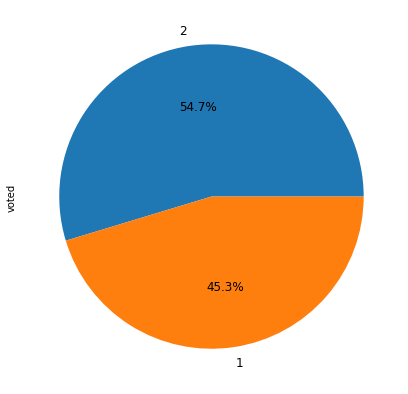

In [5]:
f, ax = plt.subplots(figsize=(7, 7))
train['voted'].value_counts().plot.pie(ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

* 타깃변수 확인: 1- YES, 2- No
* 타겟 데이터의 불균형 발견되지 않음

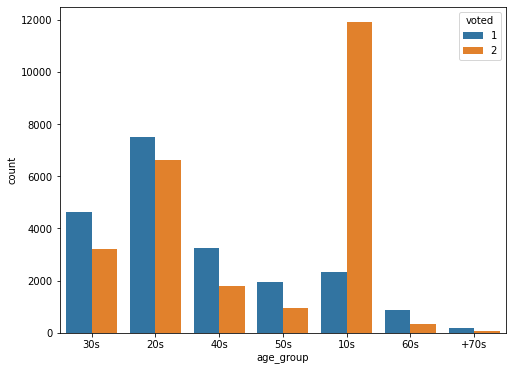

In [6]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group', hue = train['voted'])

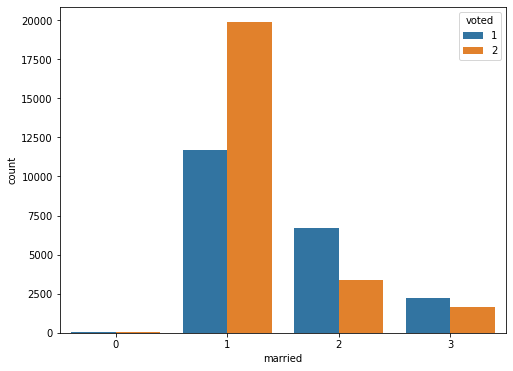

In [7]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'married', hue = train['voted'])

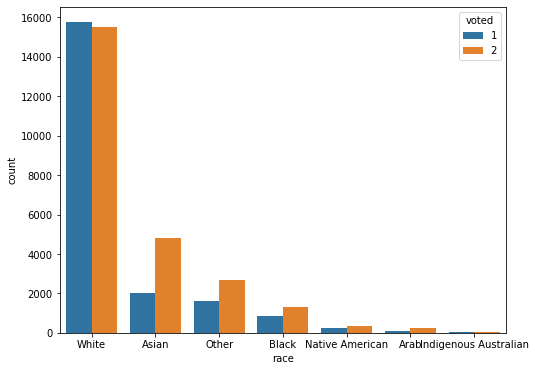

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'race', hue = train['voted'])

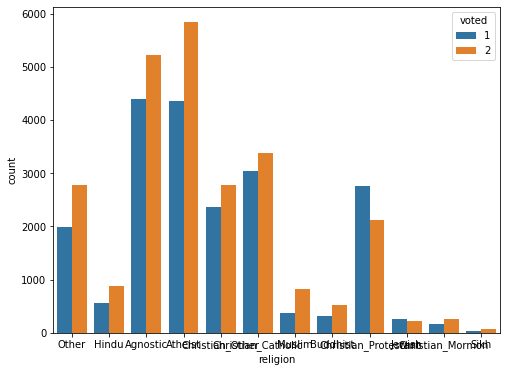

In [9]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'religion', hue = train['voted'])

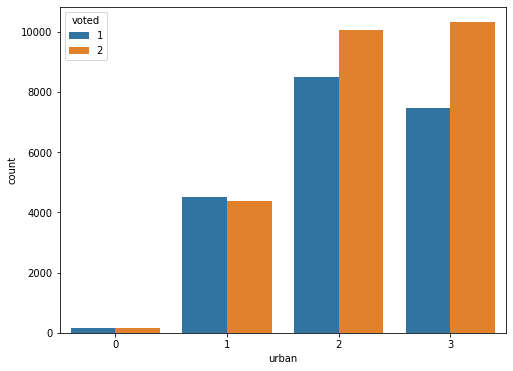

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'urban', hue = train['voted'])

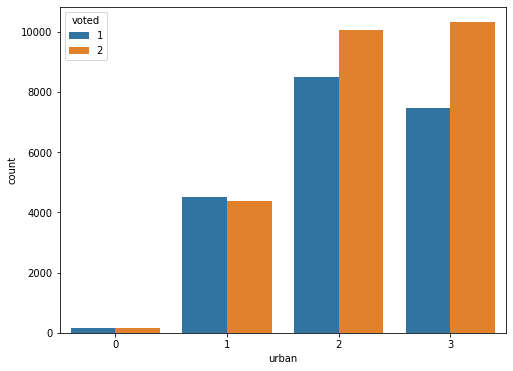

In [11]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'urban', hue = train['voted'])

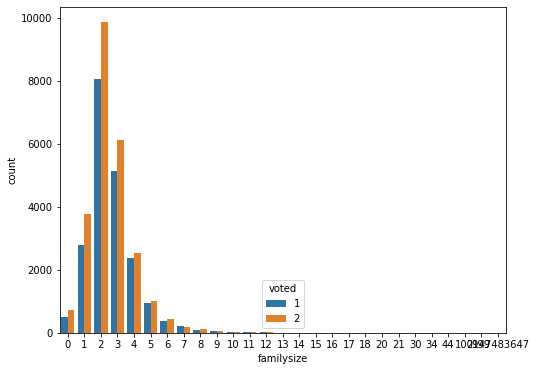

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'familysize', hue = train['voted'])

## 2.Raw Data Modeling

In [13]:
train = train.drop("index", axis=1)
test = test.drop("index", axis=1)

In [14]:
# 인코딩
train = pd.get_dummies(train)
test= pd.get_dummies(test)

In [15]:
data = train.drop('voted',axis=1)
target = train['voted']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.3, random_state=0)

### catboost- 기본모델

In [17]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_val)

Learning rate set to 0.045174
0:	learn: 0.6783163	total: 67.9ms	remaining: 1m 7s
1:	learn: 0.6688292	total: 86.8ms	remaining: 43.3s
2:	learn: 0.6601950	total: 105ms	remaining: 35s
3:	learn: 0.6490152	total: 133ms	remaining: 33s
4:	learn: 0.6396067	total: 150ms	remaining: 29.8s
5:	learn: 0.6345349	total: 166ms	remaining: 27.5s
6:	learn: 0.6287831	total: 184ms	remaining: 26.1s
7:	learn: 0.6237874	total: 206ms	remaining: 25.6s
8:	learn: 0.6169667	total: 224ms	remaining: 24.6s
9:	learn: 0.6135480	total: 241ms	remaining: 23.8s
10:	learn: 0.6096873	total: 261ms	remaining: 23.5s
11:	learn: 0.6063610	total: 280ms	remaining: 23s
12:	learn: 0.6032051	total: 298ms	remaining: 22.7s
13:	learn: 0.5993647	total: 315ms	remaining: 22.2s
14:	learn: 0.5971266	total: 332ms	remaining: 21.8s
15:	learn: 0.5934370	total: 348ms	remaining: 21.4s
16:	learn: 0.5911429	total: 369ms	remaining: 21.4s
17:	learn: 0.5889149	total: 386ms	remaining: 21s
18:	learn: 0.5871517	total: 404ms	remaining: 20.9s
19:	learn: 0.5857

In [18]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_preds)))

accuracy:0.6958
precision: 0.6482
recall: 0.7298
roc_auc: 0.6985


In [19]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_train)

Learning rate set to 0.045174
0:	learn: 0.6783163	total: 25.8ms	remaining: 25.8s
1:	learn: 0.6688292	total: 44.4ms	remaining: 22.2s
2:	learn: 0.6601950	total: 63.7ms	remaining: 21.2s
3:	learn: 0.6490152	total: 81.5ms	remaining: 20.3s
4:	learn: 0.6396067	total: 99.9ms	remaining: 19.9s
5:	learn: 0.6345349	total: 117ms	remaining: 19.3s
6:	learn: 0.6287831	total: 135ms	remaining: 19.1s
7:	learn: 0.6237874	total: 158ms	remaining: 19.6s
8:	learn: 0.6169667	total: 177ms	remaining: 19.5s
9:	learn: 0.6135480	total: 201ms	remaining: 19.9s
10:	learn: 0.6096873	total: 224ms	remaining: 20.2s
11:	learn: 0.6063610	total: 248ms	remaining: 20.4s
12:	learn: 0.6032051	total: 268ms	remaining: 20.4s
13:	learn: 0.5993647	total: 286ms	remaining: 20.1s
14:	learn: 0.5971266	total: 311ms	remaining: 20.4s
15:	learn: 0.5934370	total: 329ms	remaining: 20.3s
16:	learn: 0.5911429	total: 346ms	remaining: 20s
17:	learn: 0.5889149	total: 367ms	remaining: 20s
18:	learn: 0.5871517	total: 385ms	remaining: 19.9s
19:	learn:

In [20]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_preds)))

accuracy:0.8179
precision: 0.7662
recall: 0.8589
roc_auc: 0.8215


### catboost- 파라미터 튜닝

In [21]:
import catboost
def catboost_classifier(depth, l2_leaf_reg, num_boost_round):
    params = {
        "loss_function": "Logloss",
        "eval_metric" : "AUC", 
        "depth" : int(depth),
        "l2_leaf_reg" : int(l2_leaf_reg),
        "learning_rate" : 0.01,
        "random_state" : 42,
        "logging_level" : "Silent",
        "thread_count": 24,
        "num_boost_round": int(num_boost_round)
    }
    train_data = catboost.Pool(data=X_train, label=y_train)
    cv_result = catboost.cv(train_data,
                       params,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['test-AUC-mean'].iloc[-1]

In [22]:
catboostBO = BayesianOptimization(catboost_classifier, {
                                                'depth': (1, 4),
                                                'l2_leaf_reg': (2, 30),
                                                'num_boost_round': (100, 1000),
                                                })

catboostBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   |   depth   | l2_lea... | num_bo... |
-------------------------------------------------------------
|  1        |  0.753    |  1.216    |  23.07    |  883.2    |
|  2        |  0.7496   |  2.014    |  8.345    |  269.4    |
|  3        |  0.7585   |  3.042    |  4.849    |  997.7    |
|  4        |  0.7615   |  3.625    |  2.378    |  993.2    |
|  5        |  0.7603   |  3.513    |  2.001    |  730.7    |
|  6        |  0.7527   |  1.166    |  2.073    |  830.2    |
|  7        |  0.7584   |  3.964    |  29.87    |  484.1    |
|  8        |  0.7509   |  3.803    |  28.42    |  103.1    |
|  9        |  0.7591   |  3.985    |  3.228    |  563.2    |
|  10       |  0.7596   |  3.936    |  29.87    |  648.4    |
|  11       |  0.7613   |  3.945    |  28.55    |  993.3    |
|  12       |  0.7499   |  2.451    |  28.59    |  997.3    |


In [23]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.365), l2_leaf_reg= int(2.513), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.5))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_train)

In [24]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_param_preds)))

accuracy:0.6951
precision: 0.6395
recall: 0.7447
roc_auc: 0.6994


In [25]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.365), l2_leaf_reg= int(2.513), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.5))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_val)

In [26]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_param_preds)))

accuracy:0.6967
precision: 0.6455
recall: 0.7444
roc_auc: 0.7005


### LightGBM- 기본모델

In [27]:
from lightgbm import LGBMClassifier

In [28]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_val)

In [29]:
lgb_preds

array([2, 2, 2, ..., 1, 1, 1])

In [30]:
#정확도
print('accuracy: {:0.4f}'.format(accuracy_score(y_val, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_preds)))

accuracy: 0.6963
precision: 0.6443
recall: 0.7471
roc_auc: 0.7003


In [31]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_train)

In [32]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_preds)))

accuracy:0.7668
precision: 0.7067
recall: 0.8273
roc_auc: 0.7722


### LightGBM- 파라미터 튜닝

In [33]:
import lightgbm
def lgb_classifier (num_leaves, max_depth, 
                   lambda_l2, lambda_l1, min_child_samples, 
                   min_data_in_leaf):
    params = {"boosting_type": 'gbdt',
              "objective" : "binary",
              "metric" : "auc", 
              "is_unbalance": True,
              "num_leaves" : int(num_leaves),
              "max_depth" : int(max_depth),
              "lambda_l2" : lambda_l2,
              "lambda_l1" : lambda_l1,
              "num_threads" : 20,
              "min_child_samples" : int(min_child_samples),
              "min_data_in_leaf": int(min_data_in_leaf),
              "learning_rate" : 0.01,
              "subsample_freq" : 5,
              "bagging_seed" : 42,
              "verbosity" : -1,
              }
    train_data = lightgbm.Dataset(X_train, y_train)
    cv_result = lightgbm.cv(params,
                       train_data,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['auc-mean'][-1]

In [34]:
lgbBO = BayesianOptimization(lgb_classifier, { 'num_leaves': (25, 4000),
                                                'max_depth': (5, 40),
                                                'lambda_l2': (0.0, 0.1),
                                                'lambda_l1': (0.0, 0.1),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000)
                                                })

lgbBO.maximize(n_iter=15, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  1.0      |  0.02747  |  0.04472  |  32.08    |  7.192e+0 |  543.3    |  292.9    |
|  2        |  1.0      |  0.05402  |  0.06711  |  13.34    |  1.431e+0 |  1.226e+0 |  2.798e+0 |
|  3        |  1.0      |  0.09981  |  0.0508   |  10.33    |  9.979e+0 |  1.872e+0 |  3.944e+0 |
|  4        |  1.0      |  0.04815  |  0.000296 |  9.566    |  1.154e+0 |  1.989e+0 |  70.23    |
|  5        |  1.0      |  0.003889 |  0.08316  |  21.12    |  4.583e+0 |  587.5    |  3.483e+0 |
|  6        |  1.0      |  0.02523  |  0.01346  |  39.63    |  251.5    |  207.6    |  105.2    |
|  7        |  1.0      |  0.06285  |  0.0118   |  5.831    |  9.844e+0 |  114.4    |  3.587e+0 |
|  8        |  1.0      |  0.05487  |  0.08437  |  8.937    |  9.982e+0 |  1.957e+0 |  264.3    |
|  9        |  1.0  

In [35]:
lgb_param = LGBMClassifier(num_leaves=int(3.867e+0), max_depth=int(20.51),lambda_l2=0.09738,lambda_l1=0.03378,min_child_samples=int(348.5),
                           min_data_in_leaf=int(254.8), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_train)

In [36]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_param_preds)))

accuracy:0.6605
precision: 0.5812
recall: 0.8885
roc_auc: 0.6805


In [37]:
lgb_param = LGBMClassifier(num_leaves=int(3.867e+0), max_depth=int(20.51),lambda_l2=0.09738,lambda_l1=0.03378,min_child_samples=int(348.5),
                           min_data_in_leaf=int(254.8), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_val)

In [38]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_param_preds)))

accuracy:0.6714
precision: 0.5938
recall: 0.8865
roc_auc: 0.6886


## 3.Feature Engineering

#### 파생변수1:마키아벨리니즘 점수 계산 

In [39]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [40]:
for col in train[Answers]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [41]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

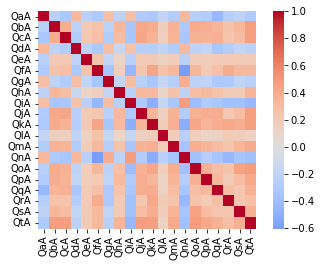

In [42]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [43]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]

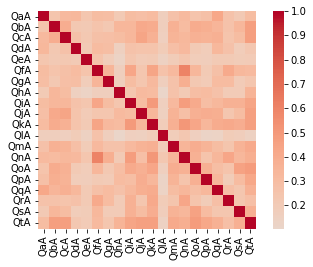

In [44]:
correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [45]:
train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,...,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Mach_score
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,...,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.95
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,...,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.60
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,...,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.90
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,...,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.35
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,...,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3.00


In [46]:
train[['Mach_score']].describe()

,Mach_score
count,45532.000000
mean,3.352474
std,0.794661
min,1.000000
25%,2.750000
50%,3.350000
75%,3.950000
max,5.000000


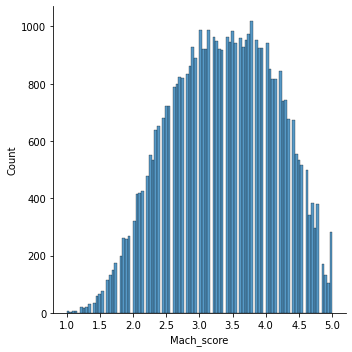

In [47]:
sns.displot(train, x="Mach_score", bins=100)

In [48]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

test['Mach_score'] = test[Answers].mean(axis = 1)

#### 이상치 제거

In [49]:
# familysize 이상치 제거
train= train[train['familysize'] < 30]
print('이상치 제거 후:',train.shape)

이상치 제거 후: (45524, 102)


#### 불필요한 변수 삭제

In [50]:
drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE',
             'hand']

#### 파생변수2: wr, wf 개수

* wr_(01~13) : 실존하는 해당 단어의 정의을 앎 1=Yes, 0=No
* wf_(01~03) : 허구인 단어의 정의를 앎 1=Yes, 0=No


In [51]:
wr_c = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11','wr_12', 'wr_13']
train['wr_sum'] = train[wr_c].sum(axis=1)

In [52]:
wf_c = ['wf_01', 'wf_02', 'wf_03']
train['wf_sum'] = train[wf_c].sum(axis=1) 

In [53]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Mach_score,wr_sum,wf_sum
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,...,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.95,7,0
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,...,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.60,8,0
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,...,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.90,10,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,...,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.35,5,0
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,...,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3.00,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,602,5.0,267,5.0,315,1.0,483,5.0,1016,4.0,278,2.0,611,5.0,215,4.0,388,5.0,299,2.0,1915,4.0,439,4.0,823,5.0,309,5.0,586,4.0,2252,...,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4.15,10,1
45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,1680,4.0,560,4.0,640,1.0,1415,4.0,4494,5.0,1392,4.0,2478,5.0,1268,3.0,843,4.0,1401,4.0,1524,4.0,719,4.0,754,3.0,1118,4.0,654,4.0,1197,...,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.80,11,1
45529,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,1690,2.0,1253,1.0,1094,1.0,1283,1.0,2209,1.0,1764,1.0,1062,5.0,1489,1.0,1908,2.0,891,1.0,1298,1.0,1200,1.0,473,1.0,1779,3.0,1355,1.0,667,...,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.50,9,0
45530,5.0,747,3.0,1331,4.0,892,4.0,1281,5.0,1328,5.0,599,5.0,650,1.0,1429,1.0,1748,1.0,770,1.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,2.0,1301,2.0,1680,4.0,737,1.0,1124,...,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2.90,10,0


In [54]:
test['wr_sum'] = test[wr_c].sum(axis=1) 
test['wf_sum'] = test[wf_c].sum(axis=1) 

In [55]:
test

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Mach_score,wr_sum,wf_sum
0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,2550,2.0,3171,1.0,3613,2.0,1494,2.0,1597,2.0,8891,1.0,2416,3.0,2043,3.0,3445,1.0,1232,3.0,1152,4.0,1447,3.0,798,2.0,1054,1.0,3462,2.0,1621,...,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2.45,6,0
1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,1150,5.0,605,4.0,601,1.0,2370,1.0,2268,3.0,1759,1.0,771,5.0,1124,3.0,4525,5.0,559,2.0,988,3.0,1014,2.0,380,1.0,995,3.0,629,4.0,708,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.80,0,0
2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,1326,4.0,767,5.0,799,1.0,1309,4.0,3317,4.0,766,2.0,1940,5.0,926,4.0,568,4.0,608,5.0,669,3.0,2417,3.0,710,2.0,2781,3.0,1110,5.0,1073,...,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3.55,7,0
3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,2533,5.0,578,5.0,742,1.0,2886,5.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,5.0,412,2.0,1076,4.0,1445,1.0,1069,5.0,847,4.0,1126,1.0,1240,...,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3.35,13,0
4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,925,4.0,413,1.0,361,1.0,995,4.0,1427,3.0,1093,1.0,1201,4.0,1264,2.0,943,2.0,475,2.0,787,4.0,607,3.0,529,2.0,947,4.0,524,3.0,1945,...,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2.90,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1.0,427,5.0,1066,5.0,588,5.0,560,4.0,1110,4.0,438,2.0,378,1.0,1616,3.0,1448,4.0,1886,2.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,2.0,828,4.0,1053,2.0,537,4.0,595,...,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3.20,9,0
11379,5.0,314,5.0,554,5.0,230,5.0,956,4.0,1173,5.0,414,5.0,637,1.0,1650,5.0,799,5.0,1220,5.0,548,5.0,630,5.0,366,5.0,287,4.0,543,5.0,505,3.0,554,5.0,600,5.0,307,4.0,722,...,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.55,13,2
11380,5.0,627,2.0,799,1.0,739,4.0,1123,5.0,829,4.0,370,4.0,430,4.0,1630,2.0,863,2.0,1452,2.0,712,4.0,1373,2.0,580,4.0,537,2.0,653,2.0,623,4.0,648,4.0,713,4.0,347,2.0,1171,...,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.15,10,2
11381,4.0,539,1.0,2090,2.0,4642,5.0,673,4.0,1185,5.0,525,2.0,1463,1.0,1483,5.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,5.0,872,3.0,8006,1.0,878,2.0,515,4.0,4406,4.0,471,2.0,1870,...,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.05,8,0


#### 파생변수3: tp 분류
* tp__(01~07) : items were rated "I see myself as:" _____ such that
* tp01 : Extraverted, enthusiastic.
* tp02 : Critical, quarrelsome.
* tp03 : Dependable, self-disciplined.
* tp04 : Anxious, easily upset.
* tp05 : Open to new experiences, complex.
* tp06 : Reserved, quiet.
* tp07 : Sympathetic, warm.
* tp08 : Disorganized, careless.
* tp09 : Calm, emotionally stable.
* tp10 : Conventional, uncreative.

In [56]:
# -부호를 가진 문항들의 답변값을 reverse
flipping_columns2 = ['tp02', 'tp04', 'tp06', 'tp08', 'tp10']
for flip in flipping_columns2: 
    train[flip] = 8 - train[flip]

# TIPI 점수
train['Extraversion'] = train['tp01'] + train['tp06'] 
train['Agreeableness'] = train['tp02'] + train['tp07']
train['Conscientiousness'] = train['tp03'] + train['tp08']
train['EmotionalStability'] = train['tp04'] + train['tp09'] 
train['OpennesstoExperiences'] = train['tp05'] + train['tp10']

In [57]:
# TIPI 점수
for flip in flipping_columns2: 
    test[flip] = 8 - test[flip]

test['Extraversion'] = test['tp01'] + test['tp06'] 
test['Agreeableness'] = test['tp02'] + test['tp07']
test['Conscientiousness'] = test['tp03'] + test['tp08'] 
test['EmotionalStability'] = test['tp04'] + test['tp09'] 
test['OpennesstoExperiences'] = test['tp05'] + test['tp10'] 

In [58]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,...,wr_10,wr_11,wr_12,wr_13,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Mach_score,wr_sum,wf_sum,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,OpennesstoExperiences
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,...,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.95,7,0,9,13,6,11,7
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,...,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.60,8,0,7,10,4,8,5
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,...,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.90,10,1,6,7,3,4,8
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,...,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.35,5,0,7,5,6,8,6
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,...,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3.00,11,1,7,7,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,602,5.0,267,5.0,315,1.0,483,5.0,1016,4.0,278,2.0,611,5.0,215,4.0,388,5.0,299,2.0,1915,4.0,439,4.0,823,5.0,309,5.0,586,4.0,2252,...,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4.15,10,1,3,9,14,13,6
45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,1680,4.0,560,4.0,640,1.0,1415,4.0,4494,5.0,1392,4.0,2478,5.0,1268,3.0,843,4.0,1401,4.0,1524,4.0,719,4.0,754,3.0,1118,4.0,654,4.0,1197,...,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.80,11,1,7,9,6,6,4
45529,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,1690,2.0,1253,1.0,1094,1.0,1283,1.0,2209,1.0,1764,1.0,1062,5.0,1489,1.0,1908,2.0,891,1.0,1298,1.0,1200,1.0,473,1.0,1779,3.0,1355,1.0,667,...,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.50,9,0,11,4,8,5,2
45530,5.0,747,3.0,1331,4.0,892,4.0,1281,5.0,1328,5.0,599,5.0,650,1.0,1429,1.0,1748,1.0,770,1.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,2.0,1301,2.0,1680,4.0,737,1.0,1124,...,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2.90,10,0,8,9,6,6,4


In [59]:
test

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,...,wr_10,wr_11,wr_12,wr_13,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Mach_score,wr_sum,wf_sum,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,OpennesstoExperiences
0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,2550,2.0,3171,1.0,3613,2.0,1494,2.0,1597,2.0,8891,1.0,2416,3.0,2043,3.0,3445,1.0,1232,3.0,1152,4.0,1447,3.0,798,2.0,1054,1.0,3462,2.0,1621,...,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2.45,6,0,8,9,6,8,5
1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,1150,5.0,605,4.0,601,1.0,2370,1.0,2268,3.0,1759,1.0,771,5.0,1124,3.0,4525,5.0,559,2.0,988,3.0,1014,2.0,380,1.0,995,3.0,629,4.0,708,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.80,0,0,8,8,8,8,8
2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,1326,4.0,767,5.0,799,1.0,1309,4.0,3317,4.0,766,2.0,1940,5.0,926,4.0,568,4.0,608,5.0,669,3.0,2417,3.0,710,2.0,2781,3.0,1110,5.0,1073,...,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3.55,7,0,13,8,9,12,13
3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,2533,5.0,578,5.0,742,1.0,2886,5.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,5.0,412,2.0,1076,4.0,1445,1.0,1069,5.0,847,4.0,1126,1.0,1240,...,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3.35,13,0,2,3,4,3,2
4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,925,4.0,413,1.0,361,1.0,995,4.0,1427,3.0,1093,1.0,1201,4.0,1264,2.0,943,2.0,475,2.0,787,4.0,607,3.0,529,2.0,947,4.0,524,3.0,1945,...,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2.90,10,0,14,12,8,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1.0,427,5.0,1066,5.0,588,5.0,560,4.0,1110,4.0,438,2.0,378,1.0,1616,3.0,1448,4.0,1886,2.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,2.0,828,4.0,1053,2.0,537,4.0,595,...,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3.20,9,0,5,9,8,9,3
11379,5.0,314,5.0,554,5.0,230,5.0,956,4.0,1173,5.0,414,5.0,637,1.0,1650,5.0,799,5.0,1220,5.0,548,5.0,630,5.0,366,5.0,287,4.0,543,5.0,505,3.0,554,5.0,600,5.0,307,4.0,722,...,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.55,13,2,4,8,10,14,4
11380,5.0,627,2.0,799,1.0,739,4.0,1123,5.0,829,4.0,370,4.0,430,4.0,1630,2.0,863,2.0,1452,2.0,712,4.0,1373,2.0,580,4.0,537,2.0,653,2.0,623,4.0,648,4.0,713,4.0,347,2.0,1171,...,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.15,10,2,10,7,3,2,4
11381,4.0,539,1.0,2090,2.0,4642,5.0,673,4.0,1185,5.0,525,2.0,1463,1.0,1483,5.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,5.0,872,3.0,8006,1.0,878,2.0,515,4.0,4406,4.0,471,2.0,1870,...,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.05,8,0,10,3,3,3,3


## 4.Modeling 최종

In [60]:
# 인코딩
train = pd.get_dummies(train)
test= pd.get_dummies(test)

In [61]:
data = train.drop('voted',axis=1)
target = train['voted']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.3, random_state=0)

### catboost- 전처리 후 기본모델 

In [63]:
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_val)

Learning rate set to 0.04517
0:	learn: 0.6817451	total: 35.2ms	remaining: 35.2s
1:	learn: 0.6712844	total: 54.3ms	remaining: 27.1s
2:	learn: 0.6592709	total: 72.7ms	remaining: 24.2s
3:	learn: 0.6512766	total: 90.2ms	remaining: 22.5s
4:	learn: 0.6415790	total: 109ms	remaining: 21.7s
5:	learn: 0.6329005	total: 128ms	remaining: 21.2s
6:	learn: 0.6272874	total: 153ms	remaining: 21.7s
7:	learn: 0.6202467	total: 172ms	remaining: 21.3s
8:	learn: 0.6145359	total: 190ms	remaining: 20.9s
9:	learn: 0.6106793	total: 212ms	remaining: 21s
10:	learn: 0.6066757	total: 232ms	remaining: 20.9s
11:	learn: 0.6032350	total: 251ms	remaining: 20.7s
12:	learn: 0.6000924	total: 281ms	remaining: 21.3s
13:	learn: 0.5977598	total: 309ms	remaining: 21.7s
14:	learn: 0.5952896	total: 328ms	remaining: 21.6s
15:	learn: 0.5932804	total: 347ms	remaining: 21.3s
16:	learn: 0.5900838	total: 366ms	remaining: 21.1s
17:	learn: 0.5879984	total: 383ms	remaining: 20.9s
18:	learn: 0.5861011	total: 401ms	remaining: 20.7s
19:	learn:

In [64]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_preds)))

accuracy:0.6965
precision: 0.6438
recall: 0.7399
roc_auc: 0.7002


In [65]:
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_train)

Learning rate set to 0.04517
0:	learn: 0.6817451	total: 20.4ms	remaining: 20.3s
1:	learn: 0.6712844	total: 43.8ms	remaining: 21.9s
2:	learn: 0.6592709	total: 62.5ms	remaining: 20.8s
3:	learn: 0.6512766	total: 80.9ms	remaining: 20.1s
4:	learn: 0.6415790	total: 110ms	remaining: 21.9s
5:	learn: 0.6329005	total: 132ms	remaining: 21.9s
6:	learn: 0.6272874	total: 154ms	remaining: 21.8s
7:	learn: 0.6202467	total: 173ms	remaining: 21.4s
8:	learn: 0.6145359	total: 191ms	remaining: 21.1s
9:	learn: 0.6106793	total: 213ms	remaining: 21.1s
10:	learn: 0.6066757	total: 234ms	remaining: 21s
11:	learn: 0.6032350	total: 256ms	remaining: 21.1s
12:	learn: 0.6000924	total: 277ms	remaining: 21s
13:	learn: 0.5977598	total: 296ms	remaining: 20.9s
14:	learn: 0.5952896	total: 321ms	remaining: 21.1s
15:	learn: 0.5932804	total: 342ms	remaining: 21s
16:	learn: 0.5900838	total: 361ms	remaining: 20.9s
17:	learn: 0.5879984	total: 379ms	remaining: 20.7s
18:	learn: 0.5861011	total: 396ms	remaining: 20.5s
19:	learn: 0.5

In [66]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_preds)))

accuracy:0.8139
precision: 0.7621
recall: 0.8569
roc_auc: 0.8176


### catboost- 전처리 후 파라미터 튜닝 

In [67]:
def catboost_classifier(depth, l2_leaf_reg, num_boost_round):
    params = {
        "loss_function": "Logloss",
        "eval_metric" : "AUC", 
        "depth" : int(depth),
        "l2_leaf_reg" : int(l2_leaf_reg),
        "learning_rate" : 0.01,
        "random_state" : 42,
        "logging_level" : "Silent",
        "thread_count": 24,
        "num_boost_round": int(num_boost_round)
    }
    train_data = catboost.Pool(data=X_train, label=y_train)
    cv_result = catboost.cv(train_data,
                       params,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['test-AUC-mean'].iloc[-1]

In [68]:
catboostBO = BayesianOptimization(catboost_classifier, {
                                                'depth': (1, 4),
                                                'l2_leaf_reg': (2, 30),
                                                'num_boost_round': (100, 1000),
                                                })

catboostBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   |   depth   | l2_lea... | num_bo... |
-------------------------------------------------------------
|  1        |  0.7536   |  2.255    |  16.36    |  323.6    |
|  2        |  0.7539   |  2.872    |  29.47    |  261.6    |
|  3        |  0.7615   |  2.196    |  29.4     |  999.4    |
|  4        |  0.7545   |  2.43     |  2.257    |  999.8    |
|  5        |  0.7596   |  2.616    |  29.98    |  702.1    |
|  6        |  0.7644   |  3.78     |  29.99    |  995.0    |
|  7        |  0.7531   |  1.17     |  29.85    |  999.5    |
|  8        |  0.7553   |  4.0      |  2.0      |  100.0    |
|  9        |  0.7614   |  3.96     |  29.94    |  504.7    |
|  10       |  0.7639   |  3.924    |  29.71    |  879.3    |
|  11       |  0.7624   |  3.977    |  3.02     |  614.4    |
|  12       |  0.7633   |  3.899    |  2.63     |  771.4    |


In [69]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.493), l2_leaf_reg= int(2.373), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.9))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_train)

In [70]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train,cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, cb_param_preds)))

accuracy:0.6967
precision: 0.6398
recall: 0.7567
roc_auc: 0.7018


In [71]:
cb_param= CatBoostClassifier(loss_function= "Logloss", eval_metric= "AUC", depth= int(3.493), l2_leaf_reg= int(2.373), learning_rate= 0.01,
                             random_state= 42, logging_level= "Silent", thread_count= 24, num_boost_round= int(999.9))
cb_param.fit(X_train,y_train)
cb_param_preds= cb_param.predict(X_val)

In [72]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, cb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, cb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, cb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, cb_param_preds)))

accuracy:0.6948
precision: 0.6391
recall: 0.7508
roc_auc: 0.6996


### LightGBM- 전처리 후 기본모델 

In [73]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_val)

In [74]:
#정확도
print('accuracy: {:0.4f}'.format(accuracy_score(y_val, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val,lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_preds)))

accuracy: 0.6942
precision: 0.6376
recall: 0.7542
roc_auc: 0.6994


In [75]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_train)

In [76]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_preds)))

accuracy:0.7663
precision: 0.7062
recall: 0.8292
roc_auc: 0.7717


### LightGBM- 전처리 후 파라미터 튜닝

In [77]:
def lgb_classifier (num_leaves, max_depth, 
                   lambda_l2, lambda_l1, min_child_samples, 
                   min_data_in_leaf):
    params = {"boosting_type": 'gbdt',
              "objective" : "binary",
              "metric" : "auc", 
              "is_unbalance": True,
              "num_leaves" : int(num_leaves),
              "max_depth" : int(max_depth),
              "lambda_l2" : lambda_l2,
              "lambda_l1" : lambda_l1,
              "num_threads" : 20,
              "min_child_samples" : int(min_child_samples),
              "min_data_in_leaf": int(min_data_in_leaf),
              "learning_rate" : 0.01,
              "subsample_freq" : 5,
              "bagging_seed" : 42,
              "verbosity" : -1,
              }
    train_data = lightgbm.Dataset(X_train, y_train)
    cv_result = lightgbm.cv(params,
                       train_data,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['auc-mean'][-1]

In [78]:
lgbBO = BayesianOptimization(lgb_classifier, { 'num_leaves': (25, 4000),
                                                'max_depth': (5, 40),
                                                'lambda_l2': (0.0, 0.1),
                                                'lambda_l1': (0.0, 0.1),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000)
                                                })

lgbBO.maximize(n_iter=15, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  1.0      |  0.03692  |  0.03102  |  37.12    |  455.0    |  262.8    |  3.225e+0 |
|  2        |  1.0      |  0.0564   |  0.002952 |  29.27    |  4.279e+0 |  1.708e+0 |  3.171e+0 |
|  3        |  1.0      |  0.0125   |  0.0618   |  34.3     |  9.849e+0 |  127.3    |  182.7    |
|  4        |  1.0      |  0.06714  |  0.001558 |  5.938    |  163.8    |  1.945e+0 |  91.25    |
|  5        |  1.0      |  0.005553 |  0.04277  |  38.62    |  9.295e+0 |  1.874e+0 |  2.635e+0 |
|  6        |  1.0      |  0.07923  |  0.06552  |  16.02    |  5.372e+0 |  1.899e+0 |  1.614e+0 |
|  7        |  1.0      |  0.002698 |  0.05242  |  21.35    |  9.972e+0 |  185.8    |  3.973e+0 |
|  8        |  1.0      |  0.08917  |  0.07214  |  36.21    |  164.5    |  1.991e+0 |  3.995e+0 |
|  9        |  1.0  

In [79]:
lgb_param = LGBMClassifier(num_leaves=int(203.4), max_depth=int(8.549),lambda_l2=0.02267,lambda_l1=0.08113,min_child_samples=int(9.562e+0),
                           min_data_in_leaf=int(862.4), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_train)

In [80]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_train, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_train, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_train, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_train, lgb_param_preds)))

accuracy:0.6915
precision: 0.6258
recall: 0.7937
roc_auc: 0.7002


In [81]:
lgb_param = LGBMClassifier(num_leaves=int(203.4), max_depth=int(8.549),lambda_l2=0.02267,lambda_l1=0.08113,min_child_samples=int(9.562e+0),
                           min_data_in_leaf=int(862.4), boosting_type='gbdt', objective="binary", metric='auc', is_unbalance= True,
                           num_threads= 20,learning_rate= 0.01, subsample_freq= 5, bagging_seed= 42, verbosity= -1)
lgb_param.fit(X_train, y_train)
lgb_param_preds= lgb_param.predict(X_val)

In [82]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, lgb_param_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_val, lgb_param_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_val, lgb_param_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_val, lgb_param_preds)))

accuracy:0.6888
precision: 0.6233
recall: 0.7923
roc_auc: 0.6976


## 5.결론